<a href="https://colab.research.google.com/github/splenwilz/Predicting-Oil-Production-in-Field-X-in-the-Niger-Delta-using-Artificial-Neural-Network/blob/main/Test_on_5999_Elastics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Reading the oil data
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)
 
OilData=pd.read_excel('/content/vpd 5999.xlsx')
print('Shape before deleting duplicate values:', OilData.shape)

# Removing duplicate rows if any
OilData= OilData.drop_duplicates()
print('Shape After deleting duplicate values:', OilData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
OilData.head(10)

# OilData.info()

Shape before deleting duplicate values: (2067, 14)
Shape After deleting duplicate values: (2067, 14)


,DATEPRD,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2008-02-12,5599,11.50,308.055940,104.418090,201.250000,18.639557,14.484431,106.805939,16.294718,92.475107,284.65,38888.67,385.01
1,2008-02-13,5599,24.00,303.033518,105.402696,182.144942,16.466641,22.832986,120.888576,53.374330,89.620148,1869.70,285246.16,7.13
2,2008-02-14,5599,22.50,295.586061,105.775486,181.867887,12.659589,31.249966,113.718175,72.737631,80.120465,3124.09,509954.88,1.16
3,2008-02-15,5599,23.15,297.662702,105.751875,180.832060,5.264052,28.518930,116.830642,69.995943,84.250990,2608.28,383426.67,0.97
4,2008-02-16,5599,24.00,295.935519,105.811114,180.501045,12.384634,30.227902,115.434474,71.518347,82.359026,3051.80,418474.00,4.89
5,2008-02-17,5599,24.00,295.551657,105.831299,180.345781,14.384565,29.974052,115.205876,73.641800,82.168501,2982.63,422763.00,1.85
6,2008-02-18,5599,23.00,294.211063,105.866467,180.929248,15.980444,30.308403,113.281815,74.160157,80.263045,2980.52,413831.00,6.48
7,2008-02-19,5599,24.00,293.829243,105.867958,180.060115,18.811254,30.486977,113.769128,74.901839,81.274949,3046.19,429218.00,0.73
8,2008-02-20,5599,24.00,293.061480,105.879330,179.661744,19.740757,29.907024,113.399737,73.039017,80.773921,3057.18,442982.75,0.46
9,2008-02-21,5599,24.00,292.540247,105.883434,179.433895,19.431675,30.493011,113.106352,71.737488,79.975169,3030.33,423809.16,0.45


In [15]:


# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
OilData.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   2067 non-null   datetime64[ns]
 1   NPD_WELL_BORE_CODE        2067 non-null   int64         
 2   ON_STREAM_HRS             2067 non-null   float64       
 3   AVG_DOWNHOLE_PRESSURE     2061 non-null   float64       
 4   AVG_DOWNHOLE_TEMPERATURE  2061 non-null   float64       
 5   AVG_DP_TUBING             2061 non-null   float64       
 6   AVG_ANNULUS_PRESS         2054 non-null   float64       
 7   AVG_CHOKE_SIZE_P          2023 non-null   float64       
 8   AVG_WHP_P                 2067 non-null   float64       
 9   AVG_WHT_P                 2067 non-null   float64       
 10  DP_CHOKE_SIZE             2067 non-null   float64       
 11  BORE_OIL_VOL              2067 non-null   float64       
 12  BORE_GAS_VOL        

In [16]:
# Looking at the descriptive statistics of the data
OilData.describe(include='all')

<ipython-input-16-f4530b789879>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  OilData.describe(include='all')


,DATEPRD,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,2067,2067.0,2067.000000,2061.000000,2061.000000,2061.000000,2054.000000,2023.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000,2067.000000
unique,2067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008-02-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2008-02-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2013-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5599.0,21.543150,119.468059,49.267750,107.994778,16.294055,66.909893,53.530090,80.909550,23.793093,2067.493507,300542.938897,2333.686541
std,NaN,0.0,6.500386,129.282484,53.083486,76.656825,6.486351,26.242218,23.187292,18.416219,22.427658,1750.301001,245901.473914,1989.339531
min,NaN,5599.0,0.000000,0.000000,0.000000,0.057710,0.000000,0.000000,0.000000,0.035170,0.057710,0.000000,0.000000,-457.840000
25%,NaN,5599.0,24.000000,0.000000,0.000000,34.278151,12.587160,50.324467,34.174875,79.647028,5.407952,600.760000,97507.005000,31.830000


In [17]:


# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
OilData.nunique()



DATEPRD                     2067
NPD_WELL_BORE_CODE             1
ON_STREAM_HRS                224
AVG_DOWNHOLE_PRESSURE        948
AVG_DOWNHOLE_TEMPERATURE     948
AVG_DP_TUBING               2052
AVG_ANNULUS_PRESS           2008
AVG_CHOKE_SIZE_P            1791
AVG_WHP_P                   2058
AVG_WHT_P                   2057
DP_CHOKE_SIZE               2058
BORE_OIL_VOL                1941
BORE_GAS_VOL                1947
BORE_WAT_VOL                1826
dtype: int64

In [18]:


# Finding how many missing values are there for each column
OilData.isnull().sum()



DATEPRD                      0
NPD_WELL_BORE_CODE           0
ON_STREAM_HRS                0
AVG_DOWNHOLE_PRESSURE        6
AVG_DOWNHOLE_TEMPERATURE     6
AVG_DP_TUBING                6
AVG_ANNULUS_PRESS           13
AVG_CHOKE_SIZE_P            44
AVG_WHP_P                    0
AVG_WHT_P                    0
DP_CHOKE_SIZE                0
BORE_OIL_VOL                 0
BORE_GAS_VOL                 0
BORE_WAT_VOL                 0
dtype: int64

In [19]:
# Treating missing values of continuous variable with Median value
OilData['AVG_DOWNHOLE_PRESSURE'].fillna(value=OilData['AVG_DOWNHOLE_PRESSURE'].median(), inplace=True)
OilData['AVG_DOWNHOLE_TEMPERATURE'].fillna(value=OilData['AVG_DOWNHOLE_TEMPERATURE'].median(), inplace=True)
OilData['AVG_DP_TUBING'].fillna(value=OilData['AVG_DP_TUBING'].median(), inplace=True)
OilData['AVG_ANNULUS_PRESS'].fillna(value=OilData['AVG_ANNULUS_PRESS'].median(), inplace=True)
OilData['AVG_CHOKE_SIZE_P'].fillna(value=OilData['AVG_CHOKE_SIZE_P'].median(), inplace=True)

In [20]:
# Checking missing values again after the treatment
OilData.isnull().sum()

DATEPRD                     0
NPD_WELL_BORE_CODE          0
ON_STREAM_HRS               0
AVG_DOWNHOLE_PRESSURE       0
AVG_DOWNHOLE_TEMPERATURE    0
AVG_DP_TUBING               0
AVG_ANNULUS_PRESS           0
AVG_CHOKE_SIZE_P            0
AVG_WHP_P                   0
AVG_WHT_P                   0
DP_CHOKE_SIZE               0
BORE_OIL_VOL                0
BORE_GAS_VOL                0
BORE_WAT_VOL                0
dtype: int64

In [21]:
OilData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2066
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   2067 non-null   datetime64[ns]
 1   NPD_WELL_BORE_CODE        2067 non-null   int64         
 2   ON_STREAM_HRS             2067 non-null   float64       
 3   AVG_DOWNHOLE_PRESSURE     2067 non-null   float64       
 4   AVG_DOWNHOLE_TEMPERATURE  2067 non-null   float64       
 5   AVG_DP_TUBING             2067 non-null   float64       
 6   AVG_ANNULUS_PRESS         2067 non-null   float64       
 7   AVG_CHOKE_SIZE_P          2067 non-null   float64       
 8   AVG_WHP_P                 2067 non-null   float64       
 9   AVG_WHT_P                 2067 non-null   float64       
 10  DP_CHOKE_SIZE             2067 non-null   float64       
 11  BORE_OIL_VOL              2067 non-null   float64       
 12  BORE_GAS_VOL        

In [22]:
# Separate Target Variable and Predictor Variables
TargetVariable=['BORE_OIL_VOL']
Predictors=['ON_STREAM_HRS', 'AVG_DOWNHOLE_PRESSURE', 'DP_CHOKE_SIZE', 'BORE_WAT_VOL', 'BORE_GAS_VOL', 'AVG_WHT_P', 'AVG_WHP_P', 'AVG_CHOKE_SIZE_P', 'AVG_ANNULUS_PRESS', 'AVG_DP_TUBING', 'AVG_DOWNHOLE_TEMPERATURE']
 
X=OilData[Predictors].values
y=OilData[TargetVariable].values
 
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
 
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)
 
# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)
 
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1446, 11)
(1446, 1)
(621, 11)
(621, 1)


{'train_score': 75.57658009011551, 'test_score': 75.72463379219838, 'forecast_set': array([576.49654934, 577.24044322, 575.71576817, 576.77320409,
       553.31288165])}
RMSE TEST:  661.1958808461908
RMSE Train:  668.7443111212947
 Mean Squared Error (MSE)  :   437179.99284797016
 Mean Absolute  Error  :   449.20694699735986
 R Squared  :  0.7572463379219838
 Accuracy: 75.725%
ElasticNet()


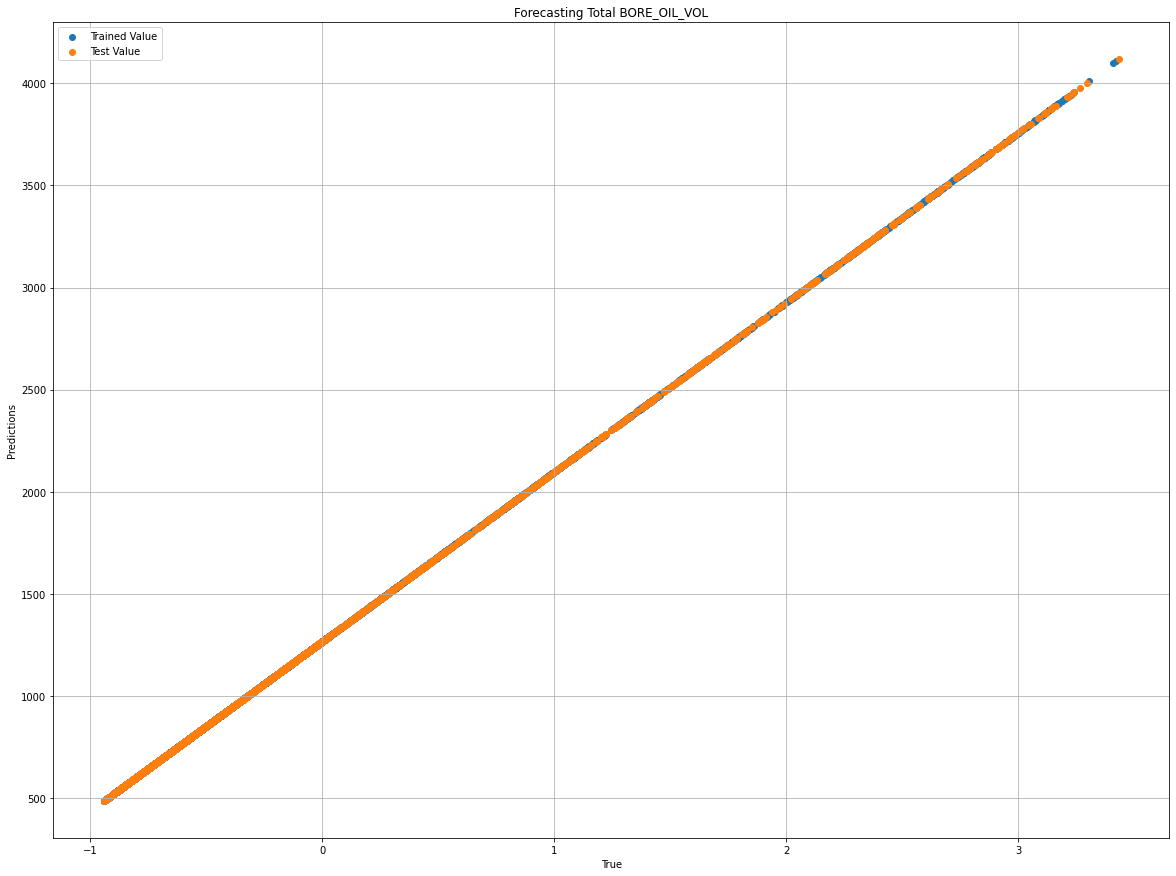

In [23]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing;
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import Ridge
#from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.svm import SVR





from  sklearn.model_selection  import train_test_split 
from sklearn import metrics


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


def prepare_data(df,forecast_col,forecast_out,test_size):
    label = df[forecast_col].shift(-forecast_out);#creating new column called label with the last 10 rows are nan
    X = np.array(df[[forecast_col]]); #creating the feature array
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True); #dropping na values
    df.index = df.DATEPRD
    df.drop('DATEPRD', axis=1, inplace=True)
    df.index = df.NPD_WELL_BORE_CODE
    df.drop('NPD_WELL_BORE_CODE', axis=1, inplace=True)
    y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size) #cross validation 

    response = [X_train,X_test , Y_train, Y_test , X_lately];
    return response;





df = pd.read_csv("final_data.csv") #loading the csv file




forecast_col = 'BORE_OIL_VOL'#choosing which column to forecast
forecast_out = 5 #how far to forecast 
test_size = 0.3; #the size of my test set

X_train, X_test, Y_train, Y_test , X_lately =prepare_data(df,forecast_col,forecast_out,test_size); #calling the method were the cross validation and data preperation is in



#initializing  regression model
#learner = KNeighborsRegressor(); #initializing  regression model
#learner = DecisionTreeRegressor()
learner = ElasticNet()


learner.fit(X_train,Y_train); #training the  model
score=learner.score(X_train,Y_train)
score2=learner.score(X_test,Y_test);#testing  model
predictions_test = learner.predict(X_test)
predictions_train = learner.predict(X_train)

forecast= learner.predict(X_lately); #set that will contain the forecasted data
response={};#creting json object
response['train_score']=score*100;
response['test_score']=score2*100; 
response['forecast_set']=forecast;

print(response);


# Calculate the root mean square error (RMSE) for test and training data
N = len(Y_test)
rmse_test = np.sqrt(np.sum((np.array(Y_test).flatten() - np.array(predictions_test).flatten())**2)/N)
print("RMSE TEST: ", rmse_test)

N = len(Y_train)
rmse_train = np.sqrt(np.sum((np.array(Y_train).flatten() - np.array(predictions_train).flatten())**2)/N)
print("RMSE Train: ", rmse_train)

# Calculate the mean square error (MSE) 
MSE = metrics.mean_squared_error(Y_test, predictions_test)
print( " Mean Squared Error (MSE)  :  " , MSE)

# Calculate the Mean Absolute  Error (MAE) 
MAE = metrics.mean_absolute_error(Y_test, predictions_test)
print( " Mean Absolute  Error  :  " , MAE)

# Calculate the Mean Absolute  Error (MAE) 
rSquared = metrics.r2_score(Y_test, predictions_test, multioutput='variance_weighted')
print( " R Squared  : " , rSquared)



result = learner.score(X_test, Y_test)
print((" Accuracy: %.3f%%") % (result*100.0))
print(learner)


import matplotlib.pyplot as plt
#from matplotlib import style

plt.figure(figsize = (20, 15))
#plt.subplots()
#style.use('fivethirtyeight')
#df['Total flow'].plot()
plt.scatter(X_train,predictions_train, label='Trained Value')
plt.scatter(X_test,predictions_test,label='Test Value')
plt.title('Forecasting Total BORE_OIL_VOL')
plt.xlabel('True' )
plt.ylabel('Predictions')
#plt.axis([-10, 40, 0, 50])
plt.grid(True)
plt.legend()
plt.savefig('eN.png')
plt.show()